In [3]:
#Importing the libraries
import os
import pandas as pd
import numpy as np

#Loading the dataset
df = pd.read_csv("../../../Data.csv")
df.head(5)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [4]:
#Data preprocessing or data cleaning
#Bad data handling
#Empty values
#Wrong formats
#Wrong data
#Duplicates

print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [5]:
#Check wrong formats
df.dtypes

Duration      int64
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object

In [13]:
#Wrong data
#non numeric values in a numeric column

for col in ['Duration','Pulse','Maxpulse','Calories']:
    if not pd.to_numeric(df[col], errors='coerce').notnull().all():
        print("\nColumn {} contains nan values".format(col))


Column Calories contains nan values


In [20]:
#Checking for negatives
for col in ['Duration','Pulse','Maxpulse','Calories']:
    if (df[col]<0).any():
        print("\nColumn {} contains negative values".format(col))
    else:
        print("\nColumn {} contains positive values".format(col))


Column Duration contains positive values

Column Pulse contains positive values

Column Maxpulse contains positive values

Column Calories contains positive values


In [21]:
#Duplicates
duplicates=df.duplicated()

if duplicates.any():
    print("\nDuplicate entries found")
    print(df[duplicates])
else:
    print("\nNo duplicate entries found")


Duplicate entries found
     Duration  Pulse  Maxpulse  Calories
36         60    102       127     300.0
37         60    100       120     300.0
38         60    100       120     300.0
40         45     90       112     180.1
71         60    109       153     387.6
113        45    100       120     225.3
155        60    111       151     368.5


In [7]:
#Recommendations
#1.Handle empty values
#2.Convert wrong formats
#3. Correct wrong data
#4. Remove duplicates in rows not columns

In [22]:
df.shape

(169, 4)

In [25]:
df.head(5)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [29]:
#Fill empty values with mean
for col in ['Duration','Pulse','Maxpulse','Calories']:
   # print(df[col].mean())
   df1= df[col].fillna(df[col].mean())

df1

0      409.1
1      479.0
2      340.0
3      282.4
4      406.0
       ...  
164    290.8
165    300.0
166    310.2
167    320.4
168    330.4
Name: Calories, Length: 169, dtype: float64

In [10]:
df.columns

Index(['Duration', 'Pulse', 'Maxpulse', 'Calories'], dtype='object')

Text(0.5, 1.0, 'Calories Distribution')

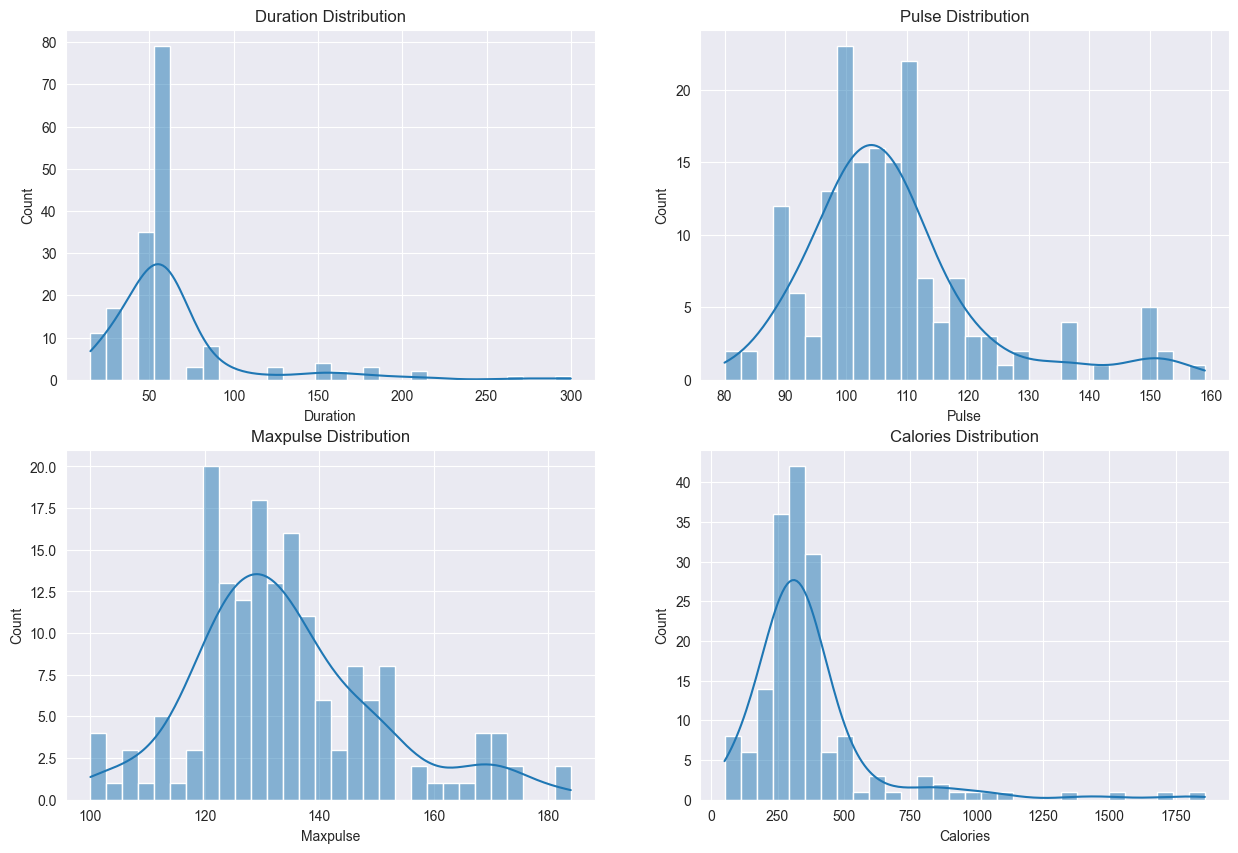

In [34]:
#Data visualization

import matplotlib.pyplot as mpl
import seaborn as sb

#Set up the figure size
mpl.figure(figsize=(15,10))

#Histogram of Duration
mpl.subplot(2,2,1)
sb.histplot(df['Duration'],bins=30,kde=True)
mpl.title('Duration Distribution')

#Histogram of Pulse
mpl.subplot(2,2,2)
sb.histplot(df['Pulse'],bins=30, kde=True)
mpl.title('Pulse Distribution')

#Histogram of Maxpulse
mpl.subplot(2,2,3)
sb.histplot(df['Maxpulse'],bins=30,kde=True)
mpl.title('Maxpulse Distribution')

#Histogram of Calories
mpl.subplot(2,2,4)
sb.histplot(df['Calories'],bins=30,kde=True)
mpl.title('Calories Distribution')